# Inaugural Project

**Imports and set magics**

In [72]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy.optimize import minimize, minimize_scalar
from ExchangeEconomy import ExchangeEconomyClass

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Question 1**

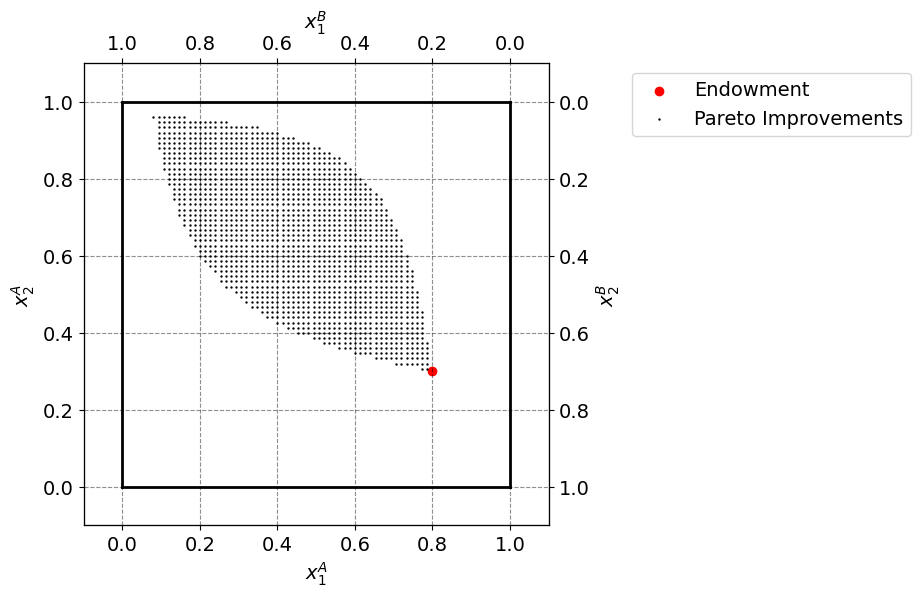

In [47]:
# define model as ExchangeEconomyClass
model = ExchangeEconomyClass()

# define benchmark
uA_endownment = model.utility_A(model.par.w1A,model.par.w2A)
uB_endownment = model.utility_B(model.par.w1B,model.par.w2B)

# finding pareto improvements
N=75
pareto_improvements = []
for x1A in np.linspace(0,1,N+1):
    for x2A in np.linspace(0,1,N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A

        uA = model.utility_A(x1A,x2A)
        uB = model. utility_B(x1B,x2B)

        if uA >= uA_endownment and uB >= uB_endownment:
            pareto_improvements.append((x1A,x2A))

# seperate x1A- and x2A-values
x1A_values, x2A_values = zip(*pareto_improvements)

# figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot endownments and pareto improvements
ax_A.scatter(model.par.w1A,model.par.w2A,marker='o',color='red',label='Endowment')
ax_A.scatter(x1A_values,x2A_values,marker='o',color='black',s=0.5,label='Pareto Improvements')

# limits
ax_A.plot([0,1],[0,0],lw=2,color='black')
ax_A.plot([0,1],[1,1],lw=2,color='black')
ax_A.plot([0,0],[0,1],lw=2,color='black')
ax_A.plot([1,1],[0,1],lw=2,color='black')

ax_A.set_xlim([-0.1, 1 + 0.1])
ax_A.set_ylim([-0.1, 1 + 0.1])    
ax_B.set_xlim([1 + 0.1, -0.1])
ax_B.set_ylim([1 + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

plt.show()

**Question 2**

In [66]:
for i, p1 in enumerate(np.linspace(0.5,2.5,N+1)):
    eps1 = model.check_market_clearing(p1)[0]
    eps2 = model.check_market_clearing(p1)[1]
    if i % 5 == 0:
        print(f'{i}: p1 = {p1:.2f} and (eps1,eps2)=({eps1:.2f},{eps2:.2f})')

0: p1 = 0.50 and (eps1,eps2)=(0.53,-0.27)
5: p1 = 0.63 and (eps1,eps2)=(0.29,-0.19)
10: p1 = 0.77 and (eps1,eps2)=(0.14,-0.11)
15: p1 = 0.90 and (eps1,eps2)=(0.03,-0.03)
20: p1 = 1.03 and (eps1,eps2)=(-0.05,0.05)
25: p1 = 1.17 and (eps1,eps2)=(-0.11,0.13)
30: p1 = 1.30 and (eps1,eps2)=(-0.16,0.21)
35: p1 = 1.43 and (eps1,eps2)=(-0.20,0.29)
40: p1 = 1.57 and (eps1,eps2)=(-0.24,0.37)
45: p1 = 1.70 and (eps1,eps2)=(-0.27,0.45)
50: p1 = 1.83 and (eps1,eps2)=(-0.29,0.53)
55: p1 = 1.97 and (eps1,eps2)=(-0.31,0.61)
60: p1 = 2.10 and (eps1,eps2)=(-0.33,0.69)
65: p1 = 2.23 and (eps1,eps2)=(-0.35,0.77)
70: p1 = 2.37 and (eps1,eps2)=(-0.36,0.85)
75: p1 = 2.50 and (eps1,eps2)=(-0.37,0.93)


**Question 3**

In [169]:
# define object function
def obj(p1):
    return np.abs(model.check_market_clearing(p1)[0])

# minimize objectfunction using minimize_scalar
result = minimize_scalar(obj, bounds=(0,10), method='bounded')

p1_3 = result.x
x1A_3 = model.demand_A(p1_best_3)[0]
x2A_3 = model.demand_A(p1_best_3)[1]
uA_3 = model.utility_A(x1A_3,x2A_3)
uB_3 = model.utility_B(1-x1A_3,1-x2A_3)

print(f'Clearing price: p1 = {p1_3:.3f}')
print(f'Optimal allocation: (x1A,x2A) = ({x1A_3:.3f},{x2A_3:.3f})')


Clearing price: p1 = 0.944
Optimal allocation: (x1A,x2A) = (0.373,0.704)


**Question 4a**

In [153]:
uA_4a = -np.inf
p1_4a = 0

for p1 in np.linspace(0.5,2.5,N+1):
    x1A = 1 - model.demand_B(p1)[0]
    x2A = 1 - model.demand_B(p1)[1]
    uA = model.utility_A(x1A,x2A)
    if uA > uA_4a:
        p1_4a = p1
        uA_4a = uA

x1A_4a = 1 - model.demand_B(p1_4a)[0]
x2A_4a = 1 - model.demand_B(p1_4a)[1]

print(f'Optimal price: p1 = {p1_4a:.3f}')
print(f'Optimal allocation: (x1A,x2A) = ({x1A_4a:.3f},{x2A_4a:.3f})')

Optimal price: p1 = 1.887
Optimal allocation: (x1A,x2A) = (0.619,0.641)


**Question 4b**

In [179]:
# define object function
def obj(p1):
    return -model.utility_A(1 - model.demand_B(p1)[0],1 - model.demand_B(p1)[1])

# minimize objectfunction using minimize_scalar
result = minimize_scalar(obj,bounds=(0,10),method="bounded")

p1_4b = result.x
x1A_4b = 1 - model.demand_B(p1_4b)[0]
x2A_4b = 1 - model.demand_B(p1_4b)[1]

print(f'Optimal price: p1 = {p1_4b:.3f}')
print(f'Optimal allocation: (x1A,x2A) = ({x1A_4b:.3f},{x2A_4b:.3f})')

Optimal price: p1 = 1.899
Optimal allocation: (x1A,x2A) = (0.621,0.640)


**Question 5a**

In [163]:
uA_5a = -np.inf
x1A_5a = np.nan
x2A_5a = np.nan

for x1A, x2A in pareto_improvements:
    uA = model.utility_A(x1A,x2A)
    if uA > uA_5a:
        uA_5a = uA
        x1A_5a = x1A
        x2A_5a = x2A

print(f'Optimal allocation: (x1A,x2A) = ({x1A_5a:.3f},{x2A_5a:.3f})')

Optimal allocation: (x1A,x2A) = (0.560,0.853)


**Question 5b**

In [196]:
# define object function
def obj(x):
    return -model.utility_A(x[0],x[1])

# define constraint function
def constraint(x):
    return model.utility_B(1-x[0],1-x[1])-model.utility_B(model.par.w1B,model.par.w2B)

# initial guess, bounds and constraint
x0 = [x1A_5a,x2A_5a]
bounds = [(0,1),(0,1)]
constraints = [{'type': 'ineq', 'fun': constraint}]

# optimze object function using minimize 
result = minimize(obj, x0, method='SLSQP', bounds=bounds, constraints=constraints)

x1A_5b = result.x[0]
x2A_5b = result.x[1]

print(f'Optimal allocation: (x1A,x2A) = ({x1A_5b:.3f},{x2A_5b:.3f})')

Optimal allocation: (x1A,x2A) = (0.576,0.844)


**Question 6a**

In [200]:
# define object function
def obj(x):
    return -(model.utility_A(x[0],x[1])+model.utility_B(1-x[0],1-x[1]))

# initial guess and bounds
x0 = [x1A_5b,x2A_5b]
bounds = [(0,1),(0,1)]

result = minimize(obj, x0, method='SLSQP', bounds=bounds)

x1A_6a = result.x[0]
x2A_6a = result.x[1]

print(f'Optimal allocation: (x1A,x2A) = ({x1A_6a:.3f},{x2A_6a:.3f})')

Optimal allocation: (x1A,x2A) = (0.333,0.667)


**Question 6b**

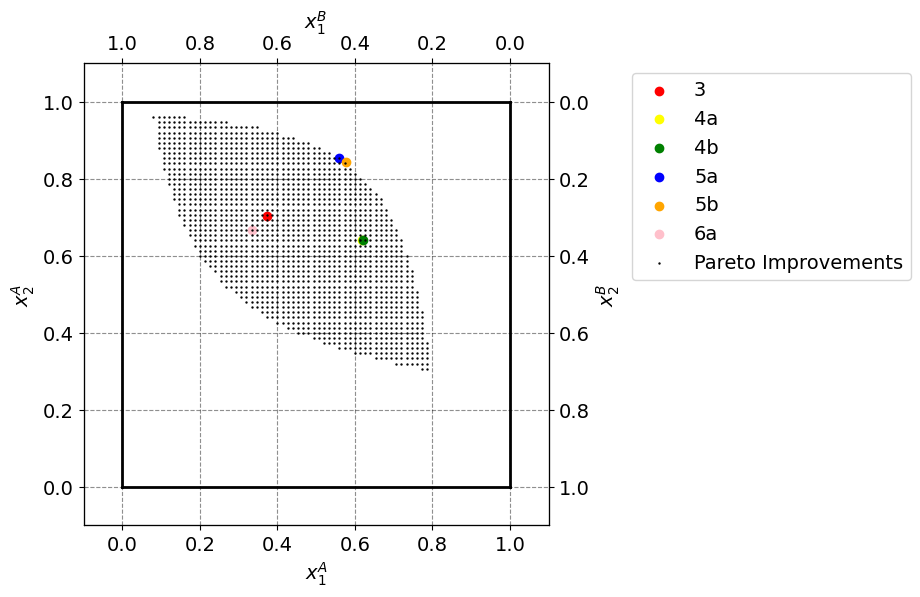

In [261]:
# figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot allocations found in 3-6a
ax_A.scatter(x1A_3,x2A_3,marker='o',color='red',label='3')
ax_A.scatter(x1A_4a,x2A_4a,marker='o',color='yellow',label='4a')
ax_A.scatter(x1A_4b,x2A_4b,marker='o',color='green',label='4b')
ax_A.scatter(x1A_5a,x2A_5a,marker='o',color='blue',label='5a')
ax_A.scatter(x1A_5b,x2A_5b,marker='o',color='orange',label='5b')
ax_A.scatter(x1A_6a,x2A_6a,marker='o',color='pink',label='6a')
ax_A.scatter(x1A_values,x2A_values,marker='o',color='black',s=0.5,label='Pareto Improvements')

# limits
ax_A.plot([0,1],[0,0],lw=2,color='black')
ax_A.plot([0,1],[1,1],lw=2,color='black')
ax_A.plot([0,0],[0,1],lw=2,color='black')
ax_A.plot([1,1],[0,1],lw=2,color='black')

ax_A.set_xlim([-0.1, 1 + 0.1])
ax_A.set_ylim([-0.1, 1 + 0.1])    
ax_B.set_xlim([1 + 0.1, -0.1])
ax_B.set_ylim([1 + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

plt.show()

In 4 the utility of A is higher compared to 3, because A gets to choose price, meanwhile B is worse off. However, both could potentially be better off compared to 3 and 4 as by 5 or 6, but there is no such price that promise this allocation given endownments. Hence, these allocations are not obtainable through trading between A and B.

**Question 7**

In [245]:
# set seed
np.random.seed(4444)

# generate random endownments
w1A=np.random.uniform(low=0,high=1,size=50)
w2A=np.random.uniform(low=0,high=1,size=50)

# zip into list of tuples
W = list(zip(w1A,w2A))

print(W)

[(0.9427985057304127, 0.9461293672679888), (0.12331966739053124, 0.9793258416076804), (0.4453487163528672, 0.18036002331797407), (0.6382151090695151, 0.27006465175886096), (0.5214936112542524, 0.177355358050851), (0.900155049220907, 0.26022949813985063), (0.25696178355242283, 0.005466534552867497), (0.1922669425199358, 0.10272466290035898), (0.18235288952426376, 0.6556130591176013), (0.4289641770618209, 0.037246002171942294), (0.27153439982446004, 0.18946069693831102), (0.1727137736513773, 0.01032485594426158), (0.18537852279973488, 0.8736109327635445), (0.6947865362605632, 0.4071269825805639), (0.9574300019870391, 0.7017010796215961), (0.5130102453094689, 0.7321347682998123), (0.6047057767859012, 0.5237659036689121), (0.5589457873183253, 0.7788233335020478), (0.08295615415650937, 0.5803782334711786), (0.7182655149712153, 0.3509483581542294), (0.24016589088290918, 0.8264941947765568), (0.540102460585074, 0.6144770750171957), (0.3021609582199549, 0.30121833601224035), (0.607432613755030

**Question 8**

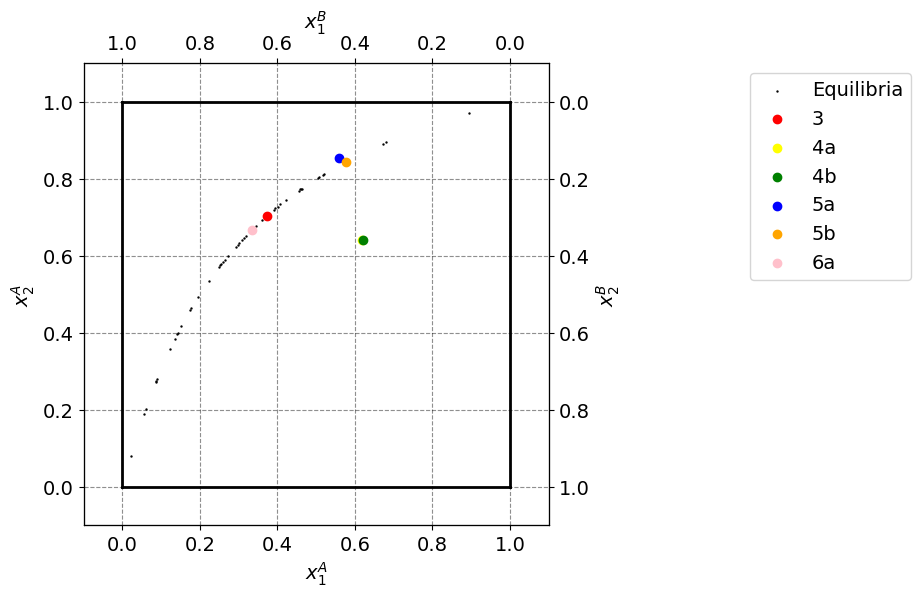

In [262]:
# define object function
def obj(p1):
    return np.abs(model.marketclearnew(p1,w1A,w2A))

# create empty list
equilibria = []

# find market equilbria given endownments
for w1A, w2A in W:
    result = minimize_scalar(obj, bounds=(0,10), method='bounded')
    equilibria.append(model.newdemand_A(result.x,w1A,w2A))

newx1A_values, newx2A_values = zip(*equilibria)

# figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# plot endownments and pareto improvements
ax_A.scatter(newx1A_values,newx2A_values,marker='o',color='black',s=0.5,label='Equilibria')
ax_A.scatter(x1A_3,x2A_3,marker='o',color='red',label='3')
ax_A.scatter(x1A_4a,x2A_4a,marker='o',color='yellow',label='4a')
ax_A.scatter(x1A_4b,x2A_4b,marker='o',color='green',label='4b')
ax_A.scatter(x1A_5a,x2A_5a,marker='o',color='blue',label='5a')
ax_A.scatter(x1A_5b,x2A_5b,marker='o',color='orange',label='5b')
ax_A.scatter(x1A_6a,x2A_6a,marker='o',color='pink',label='6a')

# limits
ax_A.plot([0,1],[0,0],lw=2,color='black')
ax_A.plot([0,1],[1,1],lw=2,color='black')
ax_A.plot([0,0],[0,1],lw=2,color='black')
ax_A.plot([1,1],[0,1],lw=2,color='black')

ax_A.set_xlim([-0.1, 1 + 0.1])
ax_A.set_ylim([-0.1, 1 + 0.1])    
ax_B.set_xlim([1 + 0.1, -0.1])
ax_B.set_ylim([1 + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

plt.show()